In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,classification_report
import pickle as pk
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import nltk
import warnings

nltk.download('punkt')
nltk.download('stopwords')
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vladt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vladt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('spam.csv', encoding='cp1252')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [8]:
df.v1.value_counts()/len(df)*100

v1
ham     86.593683
spam    13.406317
Name: count, dtype: float64

In [9]:
df.v1 = df.v1.map({"ham": 0, "spam": 1})

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.v2, df.v1, test_size=0.3, shuffle=True, random_state=42)

In [11]:
model=Pipeline([
    ('tfid', TfidfVectorizer()),
    ('model', MultinomialNB(alpha=1))
])
model.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('model', MultinomialNB(alpha=1))])

In [12]:
print(f'Model train score: {model.score(X_train, y_train)}')
print(f'Model test score: {model.score(X_test, y_test)}')

Model train score: 0.971025641025641
Model test score: 0.9599282296650717


In [13]:
y_pred=model.predict(X_test)

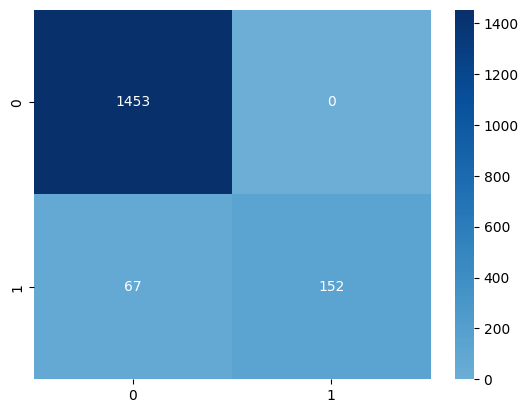

array([[1453,    0],
       [  67,  152]], dtype=int64)

In [18]:
CM = confusion_matrix(y_test, y_pred)
sns.heatmap(CM,annot=True,fmt='g',center = True,cmap='Blues')
plt.show()
CM

In [20]:
ClassificationReport = classification_report(y_test,y_pred)
print(ClassificationReport)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.69      0.82       219

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



In [21]:
pk.dump(model , open('model.sav','wb'))